In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.utils import to_categorical

In [4]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels



In [5]:
classs = { 0: "Speed limit (20km/h)", 
           1: "Speed limit (30km/h)", 
           2: "Speed limit (50km/h)", 
           3: "Speed limit (60km/h)", 
           4: "Speed limit (70km/h)", 
           5: "Speed limit (80km/h)",
           6: "End of Speed limit (80km/h)", 
           7: "Speed limit (100km/h)", 
           8: "Speed limit (120km/h)",
           9: "No passing", 
           10: "No passing veh over 3.5 tons", 
           11: "Right-of-way at intersection",
           12: "Priority road", 
           13: "Yield", 
           14: "Stop", 
           15: "No vehicles", 
           16: "Veh > 3.5 tons prohibited",
           17: "No entry", 
           18: "General caution", 
           19: "Dangerous curve left", 
           20: "Dangerous curve right", 
           21: "Double curve", 
           22: "Bumpy road", 
           23: "Slippery road", 
           24: "Road narrows on the right",
           25: "Road work", 
           26: "Traffic signals", 
           27: "Pedestrians", 
           28: "Children crossing", 
           29: "Bicycle crossing",
           30: "Beware of ice/snow", 
           31: "Wild animals crossing", 
           32: "End speed + passing limits", 
           33: "Turn right ahead", 
           34: "Turn left ahead", 
           35: "Ahead only", 
           36: "Go straight or right", 
           37: "Go straight or left", 
           38: "Keep right", 
           39: "Keep Left", 
           40: "Roundabout mandatory",
           41: "End of no passing", 
           42: "End of no passing veh > 3.5 tons"}

In [6]:
train_csv = pd.read_csv("C:/Users/asrit/OneDrive/Desktop/Traffic_sign_detection/archive/Train.csv")
test_csv = pd.read_csv("C:/Users/asrit/OneDrive/Desktop/Traffic_sign_detection/archive/Test.csv")


In [7]:
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [8]:
training_images_path = list('C:/Users/asrit/OneDrive/Desktop/Traffic_sign_detection/archive/' + train_csv['Path'])
testing_images_path = list('C:/Users/asrit/OneDrive/Desktop/Traffic_sign_detection/archive/' + test_csv['Path'])

In [9]:
train_csv['ClassId'].unique() # all unique classes available in the data 

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [10]:
# from sklearn.utils import shuffle

training_labels = list(train_csv['ClassId'])
testing_labels = list(test_csv['ClassId'])

training_labels = training_labels
testing_labels = testing_labels

print(len(training_labels))
# training_images_path,training_labels = shuffle(training_images_path,training_labels)

# training_images_path = training_images_path
# training_labels = training_labels

unique_classes = pd.unique(training_labels)
print('Total Classes = ',format(len(unique_classes)))
print('Total Training Examples = ',format(len(training_images_path)))

39209
Total Classes =  43
Total Training Examples =  39209


C:\Users\asrit\AppData\Local\Temp\ipykernel_15832\1275714205.py:15: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_classes = pd.unique(training_labels)


In [11]:
train_df = pd.DataFrame(data = {'Path':training_images_path,'Labels':training_labels})
train_df= train_df.sample(frac=1).reset_index(drop=True)


In [12]:
train_df.head()

,Path,Labels
0,C:/Users/asrit/OneDrive/Desktop/Traffic_sign_d...,15
1,C:/Users/asrit/OneDrive/Desktop/Traffic_sign_d...,14
2,C:/Users/asrit/OneDrive/Desktop/Traffic_sign_d...,35
3,C:/Users/asrit/OneDrive/Desktop/Traffic_sign_d...,39
4,C:/Users/asrit/OneDrive/Desktop/Traffic_sign_d...,2


In [18]:
import cv2

img = cv2.imread(train_df["Path"][1])
print(img.shape)  # (height, width, channels)


(34, 31, 3)


Stop


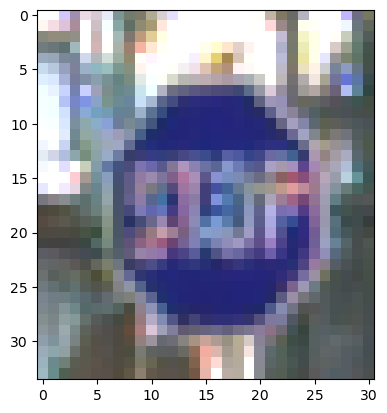

In [14]:
plt.imshow(cv2.imread(train_df["Path"][1]))
print(classs[(train_df['Labels'][1])])


In [52]:
test_df = pd.DataFrame(data = {'Path':testing_images_path,'Labels':testing_labels})
test_df= test_df.sample(frac=1).reset_index(drop=True)


[135  17 234 283  41 211 301 192 304 298  66  74 283 354 282  15 138 244
 207  44 140 153  26 356 167]


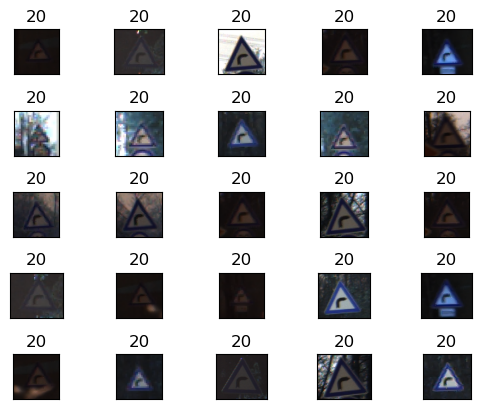

In [53]:
rand_num = np.random.randint(1 , 400,size = 25)

print(rand_num)
for num in range(len(rand_num)):
    plt.subplot(5,5,num+1)
    #print(training_images_path[rand_num[num]])
    img = cv2.imread(training_images_path[rand_num[num]])
    plt.imshow(img)
    plt.title(training_labels[rand_num[num]])
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    plt.xticks([])
    plt.yticks([])

## Since the pictures were too small and it was also in large quantity hence we havnt used data augmentation

In [54]:
training_data = []
#print(training_images_path)
for num in range(len(train_df)):
    #print(num)
    img = cv2.imread(train_df['Path'][num])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img.astype('uint8'))

    img = img/255.00
    img = cv2.resize(img, (33,33),  
               interpolation = cv2.INTER_NEAREST)
#     img = img.reshape((33,33,1))
    training_data.append(img)
    
training_data = np.array(training_data)

In [55]:
testing_data = []
#print(training_images_path)
for num in range(len(test_df)):
    #print(num)
    img = cv2.imread(test_df['Path'][num])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img.astype('uint8'))

    img = img/255.00
    img = cv2.resize(img, (33,33),  
               interpolation = cv2.INTER_NEAREST)
#     img = img.reshape(33,33,1)
    testing_data.append(img)
    
testing_data = np.array(testing_data)

In [56]:
training_data = training_data.reshape(training_data.shape[0],training_data.shape[1],training_data.shape[2],1)

In [57]:
testing_data = testing_data.reshape(testing_data.shape[0],testing_data.shape[1],testing_data.shape[2],1)

DATA AUGMENTATION

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [59]:
datagen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1,
                            rotation_range = 10,
                            horizontal_flip=False)

In [60]:
datagen.fit(training_data)

In [61]:
y_train = to_categorical(train_df.Labels) # Changing into categorical variable 
y_test = to_categorical(test_df.Labels) # changing into categorical variable 

In [62]:
batch = datagen.flow(training_data,y_train,batch_size = 20)

In [63]:
train_batch, train_label_batch = next(batch)

33


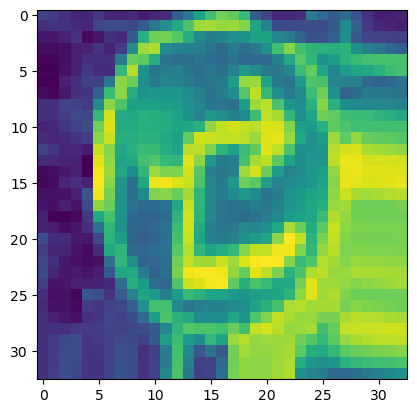

In [64]:

plt.imshow(train_batch[6].reshape(33,33))
print(np.argmax(train_label_batch[6]))

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor  = 'val_accuracy', patience = 5,restore_best_weights=True) # early stopping callbacks

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(33,33,1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

c:\Users\asrit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
history = model.fit(datagen.flow(training_data, y_train, batch_size=20), validation_data=(testing_data, y_test), epochs=30, verbose=1, callbacks=[stop])


Epoch 1/30


c:\Users\asrit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1961/1961 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.3025 - loss: 2.5414 - val_accuracy: 0.8896 - val_loss: 0.3981
Epoch 2/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7573 - loss: 0.7664 - val_accuracy: 0.9306 - val_loss: 0.2251
Epoch 3/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8324 - loss: 0.5307 - val_accuracy: 0.9564 - val_loss: 0.1641
Epoch 4/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8722 - loss: 0.4034 - val_accuracy: 0.9576 - val_loss: 0.1449
Epoch 5/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8882 - loss: 0.3517 - val_accuracy: 0.9657 - val_loss: 0.1195
Epoch 6/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9058 - loss: 0.3108 - val_accuracy: 0.9678 - val_loss: 0.1058
Epoch 7/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9161 - loss: 0.2686 - val_accuracy: 0.9683 - val_loss: 0.1110
Epoch 8/30
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9176 - loss: 0.25

In [21]:
from tensorflow.keras.models import load_model
model = load_model('model_traffic_data1.h5')
print(model.input_shape)

(None, 33, 33, 1)


In [76]:
pred = model.predict(testing_data)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [77]:
result = np.argmax(pred, axis = 1)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(test_df.Labels,result)


0.9817893903404592

In [73]:
model.save('model_traffic_data1.h5')

## Plotting the result and graphs

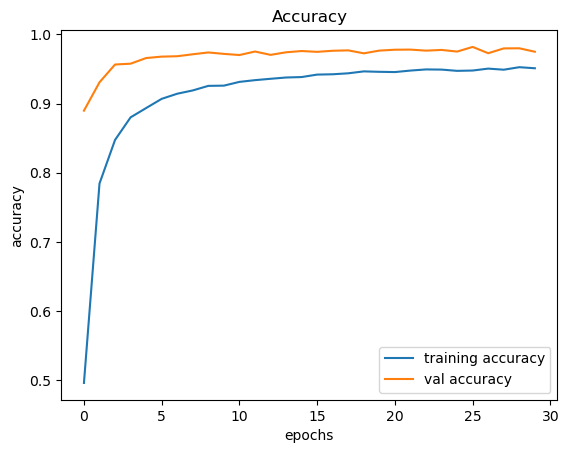

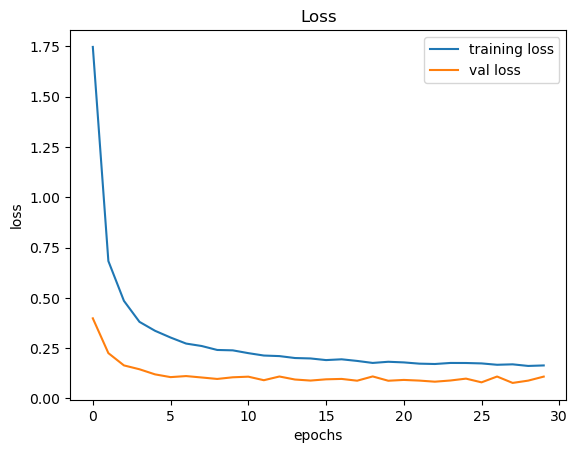

In [79]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()